In [1]:
from Utilities.Read_Show import *
from Harris import *
from cv2 import sqrt
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from scipy import signal
from scipy.spatial.distance import cdist
import time

# Harris Operator

### 1- Loading the original Image 

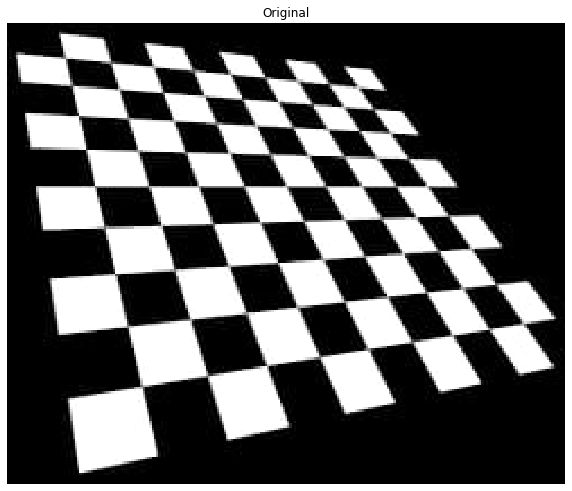

In [2]:
path1 = "images/Harris.jpeg"

img = Read_Img(path1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Display_Img("Original",img)

### 2- R Matrix Calculation

In [3]:
path1 = "images/Harris.jpeg"
R_Mat= Harris_Edge_Detector(path1,3,0.05)
print(R_Mat)

Image successfully read...
Finding Corners...
Execution time of Harris Algorithm is 0.4788172245025635  sec
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 3- Visiualizing Original Image With Detected Corners

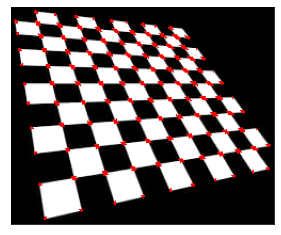

In [4]:
path1 = "images/Harris.jpeg"
Img_Features(path1,R_Mat,0.01)

# Feature Matching

1- Loading Original Images

In [5]:
original_img = cv2.imread("./images/Sift.jpg")
template_img =cv2.imread("./images/Sift_ori.jpg")

original_img = cv2.resize(original_img,(256,256))
template_img = cv2.resize(template_img,(256,256))

In [6]:
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

2- Extracting descriptors from images using SIFT

In [7]:
sift = cv2.SIFT_create() 
kp1, descriptor1 = sift.detectAndCompute(original_img, None)
kp2, descriptor2 = sift.detectAndCompute(template_img, None)

In [8]:
print("1",descriptor1)
print("2",descriptor2)
print("1",len(descriptor1))
print("2",len(descriptor2))

1 [[  0.   0.   0. ...   0.   0.   6.]
 [  1.   0.   0. ...  41. 123.   0.]
 [  0.   0.   0. ...   0.   0.   5.]
 ...
 [  0.   0.   0. ...   0.   0.   4.]
 [  0.   0.   0. ...  33.   6.   0.]
 [  0.   0.   0. ...   0.   0.   3.]]
2 [[ 22.  10. 113. ...   0.  13.  39.]
 [ 21.  64.  32. ...   0.   0.   0.]
 [  0.  10.  75. ...   4.   0.   0.]
 ...
 [  0.   0.   7. ...  23.  33.  30.]
 [  0.   0.   1. ...  11.   4.   4.]
 [  3.  14.   9. ...  17.   7.   2.]]
1 127
2 107


3- Calculate SSD for descriptors

In [9]:
def calculateSSD(desc_image1,desc_image2):
    sum_square = 0
    for m in range(len(desc_image2)-1):
        sum_square += (desc_image1[m] - desc_image2[m]) ** 2
    # The (-) sign here because the condition we applied after this function call is reversed
    SSD = - (np.sqrt(sum_square))
    return SSD

In [10]:
SSD = calculateSSD(descriptor1,descriptor2)
print("SDD",SSD)


SDD [-380.14865 -469.3549  -564.5343  -425.94717 -500.52173 -380.64813
 -389.05783 -349.79852 -847.32227 -731.601   -579.82495 -427.9264
 -560.951   -323.65878 -334.38004 -564.19763 -744.51526 -552.39386
 -434.74246 -345.82654 -354.86334 -372.86325 -403.15753 -677.9948
 -365.28894 -308.42017 -255.42514 -425.3763  -358.8412  -392.37482
 -414.3682  -425.21405 -418.4746  -496.52292 -694.1585  -559.56055
 -635.7979  -487.74072 -480.5341  -368.40466 -741.8558  -560.1848
 -568.93146 -639.9891  -637.36096 -452.98343 -394.1142  -625.1952
 -661.8172  -540.19257 -407.67145 -499.1533  -485.8292  -545.2779
 -530.9124  -482.21573 -435.90482 -423.44302 -417.8397  -476.78506
 -407.96936 -381.55865 -373.92914 -413.23843 -474.42282 -428.09695
 -470.87897 -542.8508  -580.90875 -554.7819  -658.6987  -453.83917
 -714.43823 -596.2885  -435.8073  -590.1144  -609.35785 -614.0293
 -574.54767 -524.7866  -671.744   -526.7618  -516.60333 -517.24945
 -462.10928 -478.81    -362.41    -533.6431  -398.329   -425.06


4- Calculate normalized correlation method for descriptors

In [11]:
def calculate_NCC(desc_image1, desc_image2):


    normlized_output1 = (desc_image1 - np.mean(desc_image1)) / (np.std(desc_image1))
    normlized_output2 = (desc_image2 - np.mean(desc_image2)) / (np.std(desc_image2))
    correlation_vector = np.multiply(normlized_output1, normlized_output2)
    NCC = float(np.mean(correlation_vector))

    return NCC

5- Apply Feature Matching

In [12]:
def feature_matching_temp (descriptor1,descriptor2,method):
    if(method == 'SSD'):
        ssd_time_start = time.time()
        # distances = cdist(descriptor1, descriptor2, metric = 'sqeuclidean')
    elif method =="NCC": 
        ncc_time_start = time.time()  
        # distances = cdist(descriptor1, descriptor2, metric = 'correlation')  
    keyPoints1 = descriptor1.shape[0]
    keyPoints2 = descriptor2.shape[0]

    #Store matching scores
    matched_features = []

    for kp1 in range(keyPoints1):
        # Initial variables (will be updated)
        distance = -np.inf
        y_index = -1
        for kp2 in range(keyPoints2):
            if method =="SSD":
               score = calculateSSD(descriptor1[kp1], descriptor2[kp2])
            elif method =="NCC":
                score = calculate_NCC(descriptor1[kp1], descriptor2[kp2]) 
            if score > distance:
                distance = score
                y_index = kp2

        feature = cv2.DMatch()
        #The index of the feature in the first image
        feature.queryIdx = kp1
        # The index of the feature in the second image
        feature.trainIdx = y_index
        #The distance between the two features
        feature.distance = distance
        matched_features.append(feature)
    if(method == 'SSD'):
        ssd_time_end = time.time()
        print(f"Execution time of SSD matching is {ssd_time_end - ssd_time_start}  sec")
    
    if(method == 'NCC'):
        ncc_time_end = time.time()
        print(f"Execution time of CORR matching is {ncc_time_end - ncc_time_start}  sec")    

    return matched_features

Execution time of SSD matching is 6.425272226333618  sec


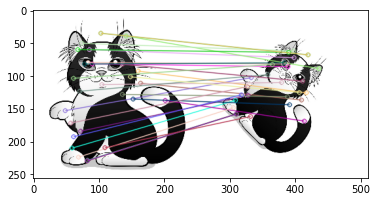

In [13]:
# Apply feature matching using SSD ::
matched_features = feature_matching_temp(descriptor1, descriptor2,"SSD")
matched_features = sorted(matched_features, key=lambda x: x.distance, reverse=True)
matched_image = cv2.drawMatches(original_img, kp1, template_img, kp2,matched_features[:30], template_img, flags=2)

plt.imshow(matched_image)
plt.show()

Execution time of CORR matching is 1.949662685394287  sec


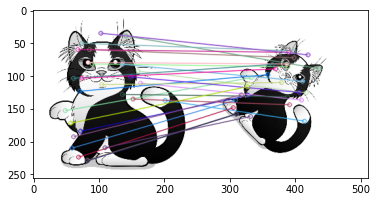

In [14]:
# Apply feature matching using NCC
matched_features = feature_matching_temp(descriptor1, descriptor2,"NCC")
matched_features = sorted(matched_features, key=lambda x: x.distance, reverse=True)
matched_image = cv2.drawMatches(original_img, kp1, template_img, kp2,matched_features[:30], template_img, flags=2)
plt.imshow(matched_image)
plt.show()


6- Testing by built in function matching

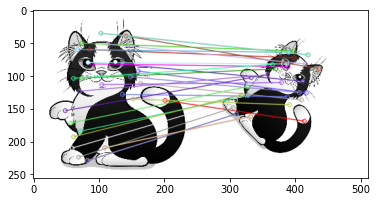

In [15]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)
matches = sorted(matches, key=lambda x: x.distance)
matched_image = cv2.drawMatches(original_img, kp1, template_img, kp2,
                                matches[:30], template_img, flags=2)

plt.imshow(matched_image)
plt.show()